# Exercício 1

![alt text](Enunciado_1.png)

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

# a) Funções para cálculo da soma
def soma_iterativa(N):
    total = 0
    for i in range(1, N + 1):
        total += i
    return total

def soma_analitica(N):
    return N * (N + 1) // 2

# b) Funções para soma com listas
def soma_com_for(lista):
    total = 0
    for num in lista:
        total += num
    return total

def soma_com_sum(lista):
    return sum(lista)

# d) Versão vetorizada com NumPy
def soma_numpy(N):
    arr = np.arange(1, N + 1, dtype=np.int64)
    return np.sum(arr)

# Medição de tempos para diferentes abordagens
def medir_tempos():
    valores_n = [10**6, 10**7, 10**8]
    tempos_iterativo = []
    tempos_analitico = []
    tempos_lista_for = []
    tempos_lista_sum = []
    tempos_numpy = []

    for N in valores_n:
        # Versão iterativa
        start = time.time()
        soma_iterativa(N)
        end = time.time()
        tempos_iterativo.append(end - start)
        
        # Versão analítica
        start = time.time()
        soma_analitica(N)
        end = time.time()
        tempos_analitico.append(end - start)
        
        # Medições com listas (apenas para N até 10^7)
        if N <= 10**7:
            lista = list(range(1, N + 1))
            
            # Soma com for
            start = time.time()
            soma_com_for(lista)
            end = time.time()
            tempos_lista_for.append(end - start)
            
            # Soma com sum()
            start = time.time()
            soma_com_sum(lista)
            end = time.time()
            tempos_lista_sum.append(end - start)
            
            # Versão NumPy
            start = time.time()
            soma_numpy(N)
            end = time.time()
            tempos_numpy.append(end - start)
        else:
            # Para N=10^8, preenche com None (não medido)
            tempos_lista_for.append(None)
            tempos_lista_sum.append(None)
            tempos_numpy.append(None)
    
    return {
        "N": valores_n,
        "iterativo": tempos_iterativo,
        "analitico": tempos_analitico,
        "lista_for": tempos_lista_for,
        "lista_sum": tempos_lista_sum,
        "numpy": tempos_numpy
    }

# c) Geração do gráfico log-log
def plotar_grafico(resultados):
    N = resultados["N"]
    plt.figure(figsize=(10, 6))
    
    # Filtra valores válidos para plotagem
    valid_n = [n for i, n in enumerate(N) if resultados["lista_for"][i] is not None]
    
    plt.loglog(N, resultados["iterativo"], 'o-', label="Iterativo (for)")
    plt.loglog(N, resultados["analitico"], 's-', label="Analítico")
    plt.loglog(valid_n, [t for t in resultados["lista_for"] if t is not None], 'D-', label="Lista com for")
    plt.loglog(valid_n, [t for t in resultados["lista_sum"] if t is not None], 'v-', label="Lista com sum()")
    plt.loglog(valid_n, [t for t in resultados["numpy"] if t is not None], 'p-', label="NumPy vetorizado")
    
    plt.xlabel("N (escala log)")
    plt.ylabel("Tempo de Execução (s) (escala log)")
    plt.title("Comparação de Tempos de Execução")
    plt.grid(True, which="both", linestyle='--')
    plt.legend()
    plt.savefig("comparacao_tempos.png", dpi=300)
    plt.show()

# Execução principal
if __name__ == "__main__":
    # a) Medição para as versões básicas
    print("=== Parte a) ===")
    for N in [10**6, 10**7, 10**8]:
        # Versão iterativa
        start = time.time()
        soma_iterativa(N)
        end = time.time()
        print(f"Iterativo (N={N}): {end - start:.6f} segundos")
        
        # Versão analítica
        start = time.time()
        soma_analitica(N)
        end = time.time()
        print(f"Analítico (N={N}): {end - start:.6f} segundos\n")
    
    # b) Medição para abordagens com listas
    print("\n=== Parte b) ===")
    for N in [10**6, 10**7]:
        lista = list(range(1, N + 1))
        
        # Soma com for
        start = time.time()
        soma_com_for(lista)
        end = time.time()
        print(f"Soma com for (N={N}): {end - start:.6f} segundos")
        
        # Soma com sum()
        start = time.time()
        soma_com_sum(lista)
        end = time.time()
        print(f"Soma com sum() (N={N}): {end - start:.6f} segundos")
        
        # Comparação de desempenho
        ratio = (end - start) / (resultados["lista_for"][resultados["N"].index(N)])
        print(f"sum() é {ratio:.2f}x mais rápido que loop for\n" if ratio < 1 else f"sum() é {1/ratio:.2f}x mais lento que loop for\n")
    
    # d) Medição para NumPy
    print("\n=== Parte d) ===")
    for N in [10**6, 10**7, 10**8]:
        start = time.time()
        soma_numpy(N) if N <= 10**7 else None  # N=10^8 não é medido para listas
        end = time.time()
        if N <= 10**7:
            print(f"NumPy (N={N}): {end - start:.6f} segundos")
    
    # Coleta de dados e plotagem
    resultados = medir_tempos()
    plotar_grafico(resultados)

=== Parte a) ===
Iterativo (N=1000000): 0.083850 segundos
Analítico (N=1000000): 0.000000 segundos

Iterativo (N=10000000): 0.794240 segundos
Analítico (N=10000000): 0.000000 segundos

Iterativo (N=100000000): 7.230014 segundos
Analítico (N=100000000): 0.000000 segundos


=== Parte b) ===
Soma com for (N=1000000): 0.049451 segundos
Soma com sum() (N=1000000): 0.000000 segundos


NameError: name 'resultados' is not defined

# Exercício 2

![alt text](Enunciado_2.png)


=== Exemplo de Cancelamento Catastrófico ===
1.0 - 1.0000000000000001 = 0.00000000000000000000e+00


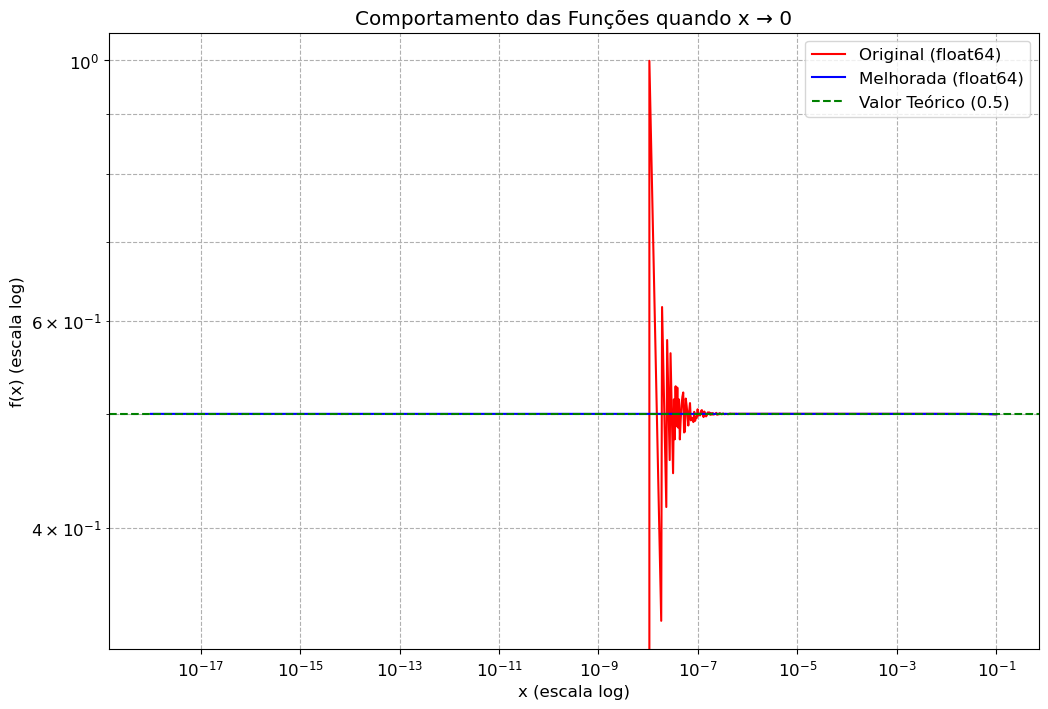

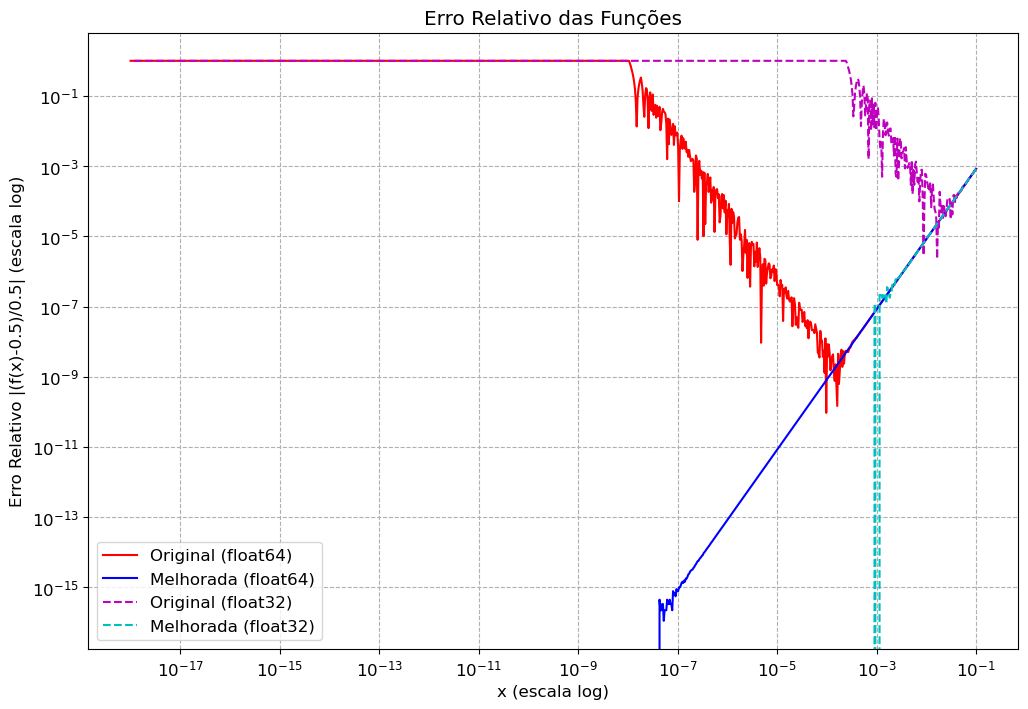

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Configuração para melhor visualização
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# a) Função original com problema numérico
def f_original(x):
    return (1 - np.cos(x)) / (x**2)

# b) Função melhorada com identidade trigonométrica
def f_melhorada(x):
    return (2 * np.sin(x/2)**2) / (x**2)

# Gerar valores de x de 10^{-1} até 10^{-18}
x_values = np.logspace(-1, -18, 1000)

# Valor teórico esperado
valor_teorico = 0.5

# c) Exemplo de cancelamento catastrófico
def exemplo_cancelamento():
    a = 1.0
    b = 1.0000000000000001
    resultado = a - b
    return resultado

# d) Cálculo com diferentes precisões
def calcular_com_precisoes():
    # Precisão dupla (float64)
    f64_orig = f_original(x_values.astype(np.float64))
    f64_melhorada = f_melhorada(x_values.astype(np.float64))
    
    # Precisão simples (float32)
    f32_orig = f_original(x_values.astype(np.float32))
    f32_melhorada = f_melhorada(x_values.astype(np.float32))
    
    return {
        'f64_orig': f64_orig,
        'f64_melhorada': f64_melhorada,
        'f32_orig': f32_orig,
        'f32_melhorada': f32_melhorada
    }

# Cálculo dos erros relativos
def calcular_erros_relativos(resultados):
    erros = {}
    for key in resultados:
        erros[key] = np.abs((resultados[key] - valor_teorico) / valor_teorico)
    return erros

# Plotagem dos resultados
def plotar_resultados(x, resultados, erros):
    # Gráfico de comportamento das funções
    plt.figure()
    plt.loglog(x, resultados['f64_orig'], 'r-', label='Original (float64)')
    plt.loglog(x, resultados['f64_melhorada'], 'b-', label='Melhorada (float64)')
    plt.axhline(y=0.5, color='g', linestyle='--', label='Valor Teórico (0.5)')
    plt.title('Comportamento das Funções quando x → 0')
    plt.xlabel('x (escala log)')
    plt.ylabel('f(x) (escala log)')
    plt.legend()
    plt.grid(True, which='both', linestyle='--')
    plt.savefig('comportamento_funcoes.png', dpi=300)
    
    # Gráfico de erros relativos
    plt.figure()
    plt.loglog(x, erros['f64_orig'], 'r-', label='Original (float64)')
    plt.loglog(x, erros['f64_melhorada'], 'b-', label='Melhorada (float64)')
    plt.loglog(x, erros['f32_orig'], 'm--', label='Original (float32)')
    plt.loglog(x, erros['f32_melhorada'], 'c--', label='Melhorada (float32)')
    plt.title('Erro Relativo das Funções')
    plt.xlabel('x (escala log)')
    plt.ylabel('Erro Relativo |(f(x)-0.5)/0.5| (escala log)')
    plt.legend()
    plt.grid(True, which='both', linestyle='--')
    plt.savefig('erros_relativos.png', dpi=300)
    plt.show()

# Execução principal
if __name__ == "__main__":
    # c) Cancelamento catastrófico
    print("\n=== Exemplo de Cancelamento Catastrófico ===")
    print(f"1.0 - 1.0000000000000001 = {exemplo_cancelamento():.20e}")
    
    # Calcular resultados
    resultados = calcular_com_precisoes()
    erros = calcular_erros_relativos(resultados)
    
    # Plotagem
    plotar_resultados(x_values, resultados, erros)

# Exercício 3

![alt text](Enunciado_3.png)

=== Resultados para diferentes métodos e n ===

Para n = 100:
Esquerda: 0.74997860 | Erro: 3.15e-03
Direita:  0.74365740 | Erro: 3.17e-03
Ponto Médio: 0.74682720 | Erro: 3.20e-06
Trapézios:  0.74681800 | Erro: 6.00e-06

Para n = 1000:
Esquerda: 0.74714013 | Erro: 3.16e-04
Direita:  0.74650801 | Erro: 3.16e-04
Ponto Médio: 0.74682416 | Erro: 1.63e-07
Trapézios:  0.74682407 | Erro: 7.15e-08

Para n = 10000:
Esquerda: 0.74685574 | Erro: 3.17e-05
Direita:  0.74679253 | Erro: 3.15e-05
Ponto Médio: 0.74682413 | Erro: 1.33e-07
Trapézios:  0.74682413 | Erro: 1.32e-07


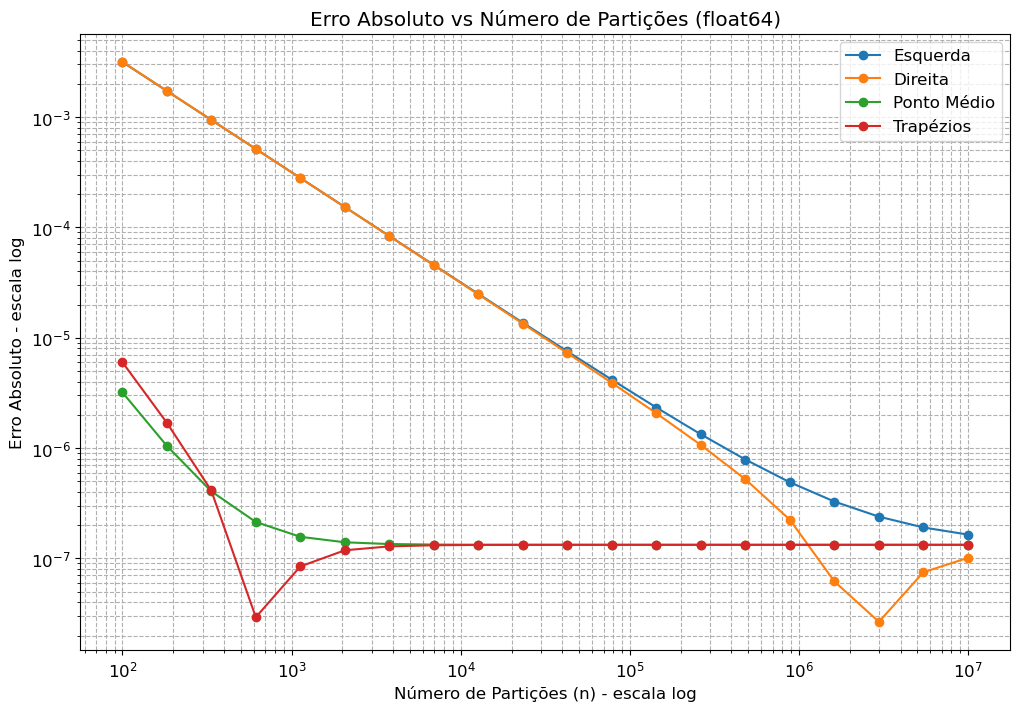

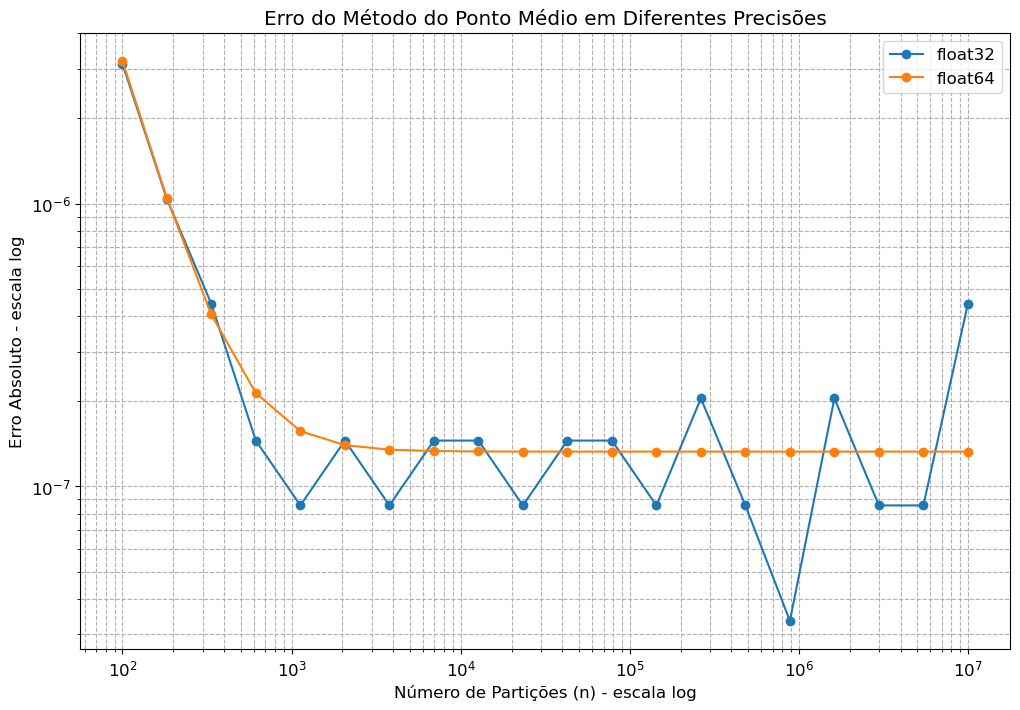

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Configurações para melhor visualização
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Valor de referência conhecido
VALOR_REFERENCIA = 0.746824

# Função a ser integrada
def f(x):
    return np.exp(-x**2)

# a) Soma de Riemann à esquerda
def riemann_esquerda(a, b, n, dtype=np.float64):
    dx = dtype((b - a) / n)
    x = np.linspace(a, b, n, endpoint=False, dtype=dtype)
    return np.sum(f(x)) * dx

# b) Outros métodos de integração numérica
def riemann_direita(a, b, n, dtype=np.float64):
    dx = dtype((b - a) / n)
    x = np.linspace(a + dx, b, n, dtype=dtype)
    return np.sum(f(x)) * dx

def riemann_medio(a, b, n, dtype=np.float64):
    dx = dtype((b - a) / n)
    x = np.linspace(a + dx/2, b - dx/2, n, dtype=dtype)
    return np.sum(f(x)) * dx

def trapezoides(a, b, n, dtype=np.float64):
    dx = dtype((b - a) / n)
    x = np.linspace(a, b, n+1, dtype=dtype)
    y = f(x)
    return dx/2 * (y[0] + 2*np.sum(y[1:-1]) + y[-1])

# c) Função para calcular erros em diferentes n
def calcular_erros(a, b, ns, dtype=np.float64):
    metodos = {
        'Esquerda': riemann_esquerda,
        'Direita': riemann_direita,
        'Ponto Médio': riemann_medio,
        'Trapézios': trapezoides
    }
    
    erros = {metodo: [] for metodo in metodos}
    
    for n in ns:
        for metodo, funcao in metodos.items():
            integral = funcao(a, b, n, dtype)
            erro = abs(integral - VALOR_REFERENCIA)
            erros[metodo].append(erro)
    
    return erros

# d) Função para comparar precisões
def comparar_precisoes(a, b, n_max):
    ns = np.logspace(2, 7, 20, dtype=int)  # n de 100 até 10,000,000
    precisoes = {
        'float32': np.float32,
        'float64': np.float64
    }
    
    erros = {}
    for nome, dtype in precisoes.items():
        erros[nome] = calcular_erros(a, b, ns, dtype)
    
    return ns, erros

# Plotagem dos resultados
def plotar_resultados(ns, erros):
    # Gráfico de erros para todos os métodos (float64)
    plt.figure()
    for metodo, valores in erros['float64'].items():
        plt.loglog(ns, valores, 'o-', label=metodo)
    
    plt.title('Erro Absoluto vs Número de Partições (float64)')
    plt.xlabel('Número de Partições (n) - escala log')
    plt.ylabel('Erro Absoluto - escala log')
    plt.legend()
    plt.grid(True, which='both', linestyle='--')
    plt.savefig('erros_metodos.png', dpi=300)
    
    # Gráfico comparando precisões para o método do ponto médio
    plt.figure()
    for precisao, metodos in erros.items():
        plt.loglog(ns, metodos['Ponto Médio'], 'o-', label=precisao)
    
    plt.title('Erro do Método do Ponto Médio em Diferentes Precisões')
    plt.xlabel('Número de Partições (n) - escala log')
    plt.ylabel('Erro Absoluto - escala log')
    plt.legend()
    plt.grid(True, which='both', linestyle='--')
    plt.savefig('erros_precisoes.png', dpi=300)
    plt.show()

# Execução principal
if __name__ == "__main__":
    # Parâmetros da integral
    a, b = 0, 1
    
    # b) Cálculo para n = 100, 1000, 10000
    ns_pequenos = [100, 1000, 10000]
    print("=== Resultados para diferentes métodos e n ===")
    for n in ns_pequenos:
        print(f"\nPara n = {n}:")
        print(f"Esquerda: {riemann_esquerda(a, b, n):.8f} "
              f"| Erro: {abs(riemann_esquerda(a, b, n) - VALOR_REFERENCIA):.2e}")
        print(f"Direita:  {riemann_direita(a, b, n):.8f} "
              f"| Erro: {abs(riemann_direita(a, b, n) - VALOR_REFERENCIA):.2e}")
        print(f"Ponto Médio: {riemann_medio(a, b, n):.8f} "
              f"| Erro: {abs(riemann_medio(a, b, n) - VALOR_REFERENCIA):.2e}")
        print(f"Trapézios:  {trapezoides(a, b, n):.8f} "
              f"| Erro: {abs(trapezoides(a, b, n) - VALOR_REFERENCIA):.2e}")
    
    # c) e d) Cálculo e plotagem de erros
    ns, erros = comparar_precisoes(a, b, n_max=10000000)
    plotar_resultados(ns, erros)
    